# sklearn 实现PCA主成分分析

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [70]:
x, y = load_wine(return_X_y=True)


In [71]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [72]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)  # 分割训练集与测试集

In [74]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

`fit_transorm()`:标准化自变量.计算公式如下:$ans = (x - mean(x))/std(x)$
通过下面的检验可以发现结果是一样的

In [83]:
x_train_std

array([[ 0.98528157, -0.34686912,  1.53885816, ...,  1.20494949,
         1.02307414,  0.43593183],
       [-1.77896945, -0.57355811,  0.86905874, ...,  1.68156216,
         0.75330775, -0.66698755],
       [ 0.15102563, -0.46514164, -0.91707303, ...,  0.33838101,
         1.02307414,  0.8577282 ],
       ...,
       [ 0.10121931,  1.29909004, -0.87986196, ..., -1.61139806,
        -1.41902158,  0.17035634],
       [-0.01084493, -0.74111084, -1.06591735, ...,  0.90165052,
         0.01499974,  0.76399567],
       [-0.03574809, -0.19902848,  3.10172346, ...,  0.68500841,
         0.73910952,  0.17035634]])

In [99]:
def show_acc(a, b):
    acc = a.ravel() == b.ravel()
    return np.mean(acc)

2
[0.99244289 0.00755711]
[6.30061232 0.54980396]
1
[0.99244289]
[6.30061232]
[[ 1.38340578]
 [ 2.22189802]
 [ 3.6053038 ]
 [-1.38340578]
 [-2.22189802]
 [-3.6053038 ]]


In [109]:
# Demo of sklearn.decomposition.KernelPCA

from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt
import numpy as np  # Youcans， XUPT

X, y = load_iris(return_X_y=True)
print(type(X))  # <class 'numpy.ndarray'>

modelPCA = PCA(n_components=2)  # 建立模型，设定保留主成分数 K=2
Xpca = modelPCA.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaP = KernelPCA(n_components=2, kernel='poly')  # 建立模型，核函数：多项式
XkpcaP = modelKpcaP.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaR = KernelPCA(n_components=2, kernel='rbf')  # 建立模型，核函数：径向基函数
XkpcaR = modelKpcaR.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaS = KernelPCA(n_components=2, kernel='cosine')  # 建立模型，核函数：余弦函数
XkpcaS = modelKpcaS.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

<class 'numpy.ndarray'>


In [110]:
Xpca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

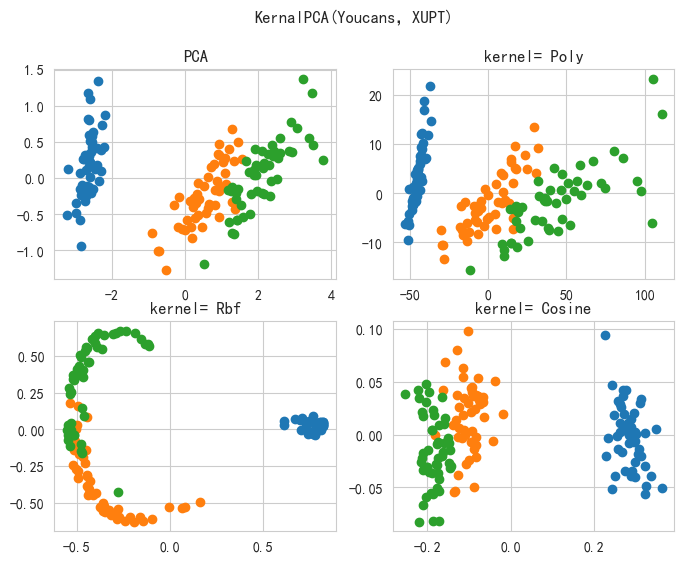

In [122]:

# === 关注 Youcans，分享更多原创系列 https://www.cnblogs.com/youcans/ ===
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
for label in np.unique(y):
    position = y == label
    ax1.scatter(Xpca[position, 0], Xpca[position, 1], label='target=%d' % label)
    ax1.set_title('PCA')
    ax2.scatter(XkpcaP[position, 0], XkpcaP[position, 1], label='target=%d' % label)
    ax2.set_title('kernel= Poly')
    ax3.scatter(XkpcaR[position, 0], XkpcaR[position, 1], label='target=%d' % label)
    ax3.set_title('kernel= Rbf')
    ax4.scatter(XkpcaS[position, 0], XkpcaS[position, 1], label='target=%d' % label)
    ax4.set_title('kernel= Cosine')
plt.suptitle("KernalPCA(Youcans，XUPT)")
plt.show()

C:\Users\moonchild\AppData\Local\Temp\ipykernel_21192\1247864526.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.unique(y) == y


False